In [622]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [1332]:
x_plot = np.arange(0,1.01,0.01)
def true_fn(x) :
    return np.sin(x)+np.sin(2*np.pi* x)+np.sin(3*np.pi*x)

y_plot = true_fn(x_plot)

In [1334]:
def noisy_data(x : np.ndarray, scale = 0.25):
    r = np.random.normal(scale = scale , size = x.shape)
    return true_fn(x) + r

N = 100

x_train = np.linspace(0, 1, N)
y_train = noisy_data(x_train)

In [1336]:
data1 = pd.DataFrame({
    'x': x_plot ,
    'y': y_plot,
    'label': 'Actual Data'
})

data2 = pd.DataFrame({
    'x': x_train,
    'y': y_train,
    'label': 'Training Data'
    
})

In [1338]:
combined_data = pd.concat([data1, data2])
combined_data

,x,y,label
0,0.000000,0.000000,Actual Data
1,0.010000,0.166899,Actual Data
2,0.020000,0.332713,Actual Data
3,0.030000,0.496368,Actual Data
4,0.040000,0.656804,Actual Data
...,...,...,...
95,0.959596,1.083939,Training Data
96,0.969697,1.034638,Training Data
97,0.979798,0.301245,Training Data
98,0.989899,0.805043,Training Data


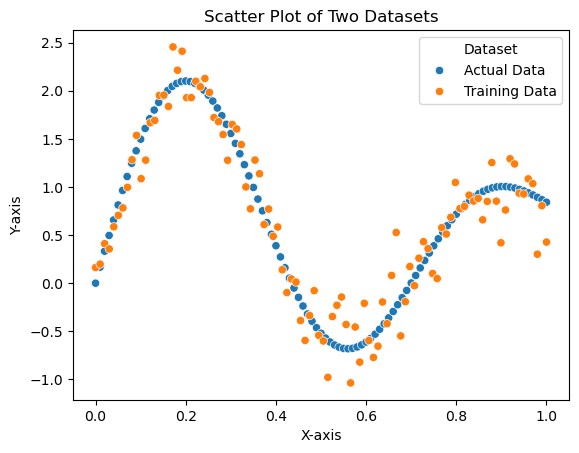

In [1340]:
# Creating the scatter plot
sns.scatterplot(data=combined_data, x='x', y='y', hue='label')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Two Datasets')
plt.legend(title='Dataset')

# Display the plot
plt.show()

In [1342]:
from sklearn.preprocessing import PolynomialFeatures

In [1344]:
def transform_features(x:np.ndarray, m:int):
    #create a polynomial of specified degrees
    return PolynomialFeatures(degree = m).fit_transform(x.reshape(-1, 1))

In [1346]:
transform_features(np.array([1,2,3,4,5]), m=10) 

array([[1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00,
        1.600000e+01, 3.200000e+01, 6.400000e+01, 1.280000e+02,
        2.560000e+02, 5.120000e+02, 1.024000e+03],
       [1.000000e+00, 3.000000e+00, 9.000000e+00, 2.700000e+01,
        8.100000e+01, 2.430000e+02, 7.290000e+02, 2.187000e+03,
        6.561000e+03, 1.968300e+04, 5.904900e+04],
       [1.000000e+00, 4.000000e+00, 1.600000e+01, 6.400000e+01,
        2.560000e+02, 1.024000e+03, 4.096000e+03, 1.638400e+04,
        6.553600e+04, 2.621440e+05, 1.048576e+06],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02,
        6.250000e+02, 3.125000e+03, 1.562500e+04, 7.812500e+04,
        3.906250e+05, 1.953125e+06, 9.765625e+06]])

In [1348]:
def mr_fit(features : np.ndarray, y_train : np.ndarray):
    A = features.T @ features
    weight_vector = np.linalg.solve(A,features.T @ y_train)
    return weight_vector


In [1350]:
def mr_predict(features : np.ndarray, weight_vector : np.ndarray):
    return np.dot(features, weight_vector)
    

# Line Fit m=1

#### Consider one Training data set in which , X : features and t : target variables are given to find out weights. Using that we will find out the weights vector and after that we will predict the values  

In [1354]:
r=np.random.randint(1, 101, size=10)
r

array([15, 50,  3, 22, 32, 18, 91, 35, 86, 15])

In [1389]:
features_train = transform_features(np.random.randint(1, 100, size=500), m=1) # trainign features 


In [1391]:
features_train_df = pd.DataFrame({'x^0': features_train[:, 0], 'x^1': features_train[:, 1]})
features_train_df.head()

,x^0,x^1
0,1.0,11.0
1,1.0,51.0
2,1.0,92.0
3,1.0,82.0
4,1.0,17.0


In [1393]:
x_df = pd.DataFrame({ 'x^1': features_train[:, 1]})
x_df.head()

,x^1
0,11.0
1,51.0
2,92.0
3,82.0
4,17.0


In [1395]:
target_train = noisy_data(pd.DataFrame({ 'target_train': features_train[:, 1]})) # training target 
target_train.head()

,target_train
0,-0.997993
1,0.675284
2,-0.842605
3,0.266700
4,-0.880604


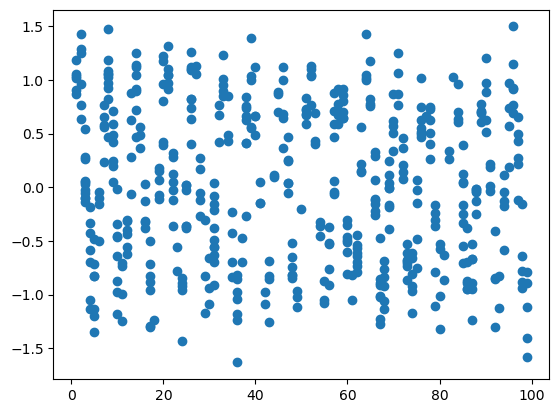

In [1397]:
plt.plot(x_df, target_train, 'o')

In [1399]:
weight_vector = mr_fit(features_train, target_train) #calculating the values of weights 

In [1401]:
weight_vector

array([[ 0.14319107],
       [-0.00262159]])

In [1403]:
predicted = mr_predict(features_train, weight_vector)
predicted_df = pd.DataFrame(predicted)
predicted_df.head()

,0
0,0.114354
1,0.009490
2,-0.097996
3,-0.071780
4,0.098624


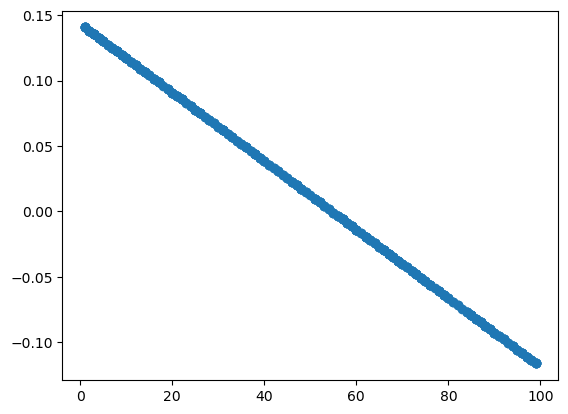

In [1405]:
plt.plot(x_df, predicted,'o')

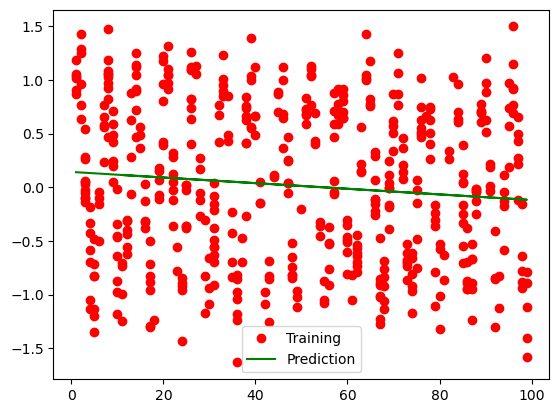

In [1407]:
plt.plot(x_df, target_train,'o', color='r', label='Training')
plt.plot(x_df, predicted, color='g', label='Prediction')
plt.legend()

# Polynomial fit 

In [1410]:
x = np.linspace(0,11,10)
x

array([ 0.        ,  1.22222222,  2.44444444,  3.66666667,  4.88888889,
        6.11111111,  7.33333333,  8.55555556,  9.77777778, 11.        ])

In [1412]:
y = x**1 + x**2 + x**3
y

array([   0.        ,    4.54183813,   23.0260631 ,   66.40740741,
        145.64060357,  271.68038409,  455.48148148,  707.99862826,
       1040.18655693, 1463.        ])

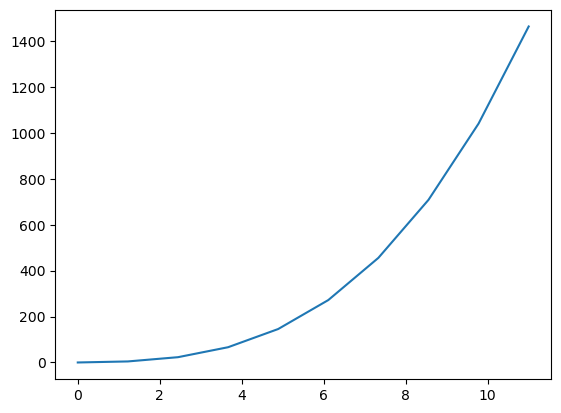

In [1414]:
plt.plot(x,y)

generating values of traning data set 
- features_train 
- target_train

In [1983]:
features_train = transform_features(np.linspace(0,5,1000), m=200) # trainign features

In [1985]:
target_train = noisy_data(features_train[:, 1]) # training target , considering sin function :  check noisy data function for this 


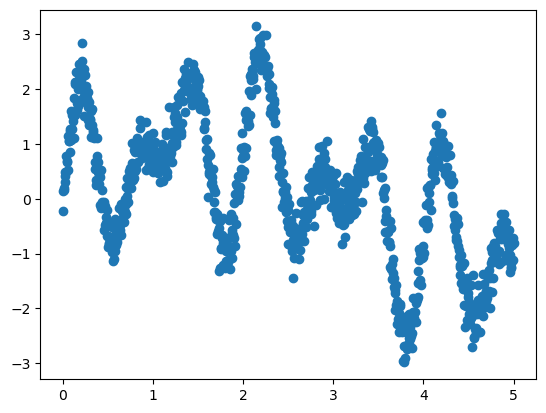

In [1987]:
plt.plot(features_train[:,1], target_train, 'o')


In [1989]:
weight_vector = mr_fit(features_train, target_train)

In [1991]:
predicted = mr_predict(features_train, weight_vector)

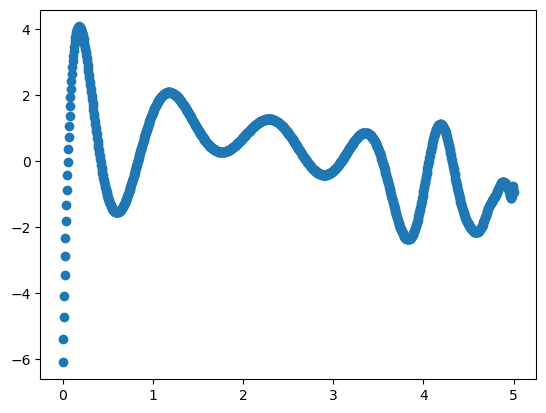

In [1993]:
plt.plot(features_train[:,1], predicted, 'o')

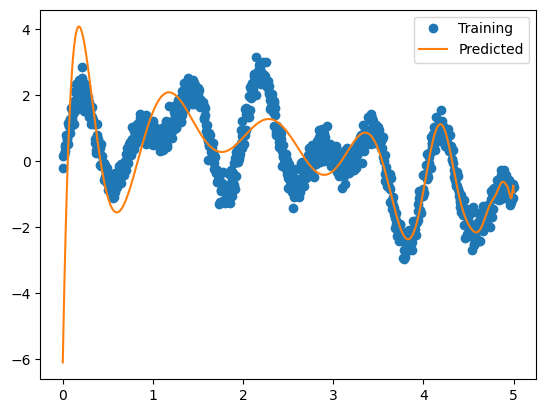

In [1995]:
plt.plot(features_train[:,1], target_train, 'o', label = 'Training')
plt.plot(features_train[:,1], predicted, label = 'Predicted')
plt.legend()

## using regularisation

In [2568]:
features_train = transform_features(np.linspace(0,5,1000), m=75) # trainign features

In [2570]:
target_train = noisy_data(features_train[:, 1]) # training target , considering sin function :  check noisy data function for this 

In [2572]:
def multiple_regression_ridge_fit(features, y_train, lamb):
    # Note - addition of second term for A_t
    A_t = features.T @ features + lamb * np.eye(features.shape[1], features.shape[1])
    weight_vector = np.linalg.solve(A_t, features.T @ y_train)
    return weight_vector

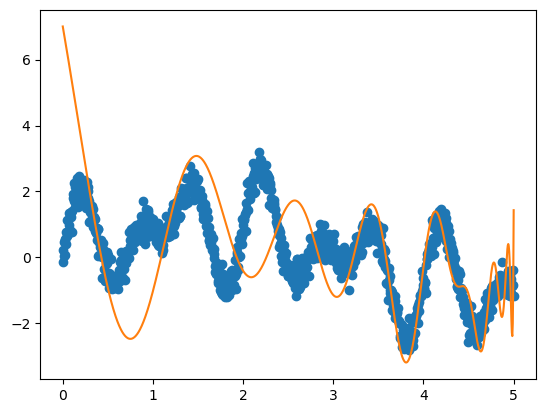

In [2778]:
weight_vector = multiple_regression_ridge_fit(features_train, target_train, -4.13467)
predicted = mr_predict(features_train, weight_vector)

plt.plot(features_train[:,1],target_train,'o' )
plt.plot(features_train[:,1], predicted)


### 

# Gaussian Treatment : Bayesian Curve fitting

In [2883]:
import os
import functools

plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [2885]:
N = 10 
SEED = 1234
SCALE = 0.25

In [2887]:
np.random.seed(SEED)

In [2889]:
def true_func(x):
    return np.sin(2* np.pi * x)

def generate_noisy_data(x, scale = SCALE):
    y = true_func(x) + np.random.normal(scale= SCALE , size = x.shape)
    return y
    

In [2891]:
x_plot = np.linspace(0, 1, 100)
y_plot = true_func(x_plot)

In [2893]:
x_train = np.linspace(0,1,N)
y_train = generate_noisy_data(x_train)

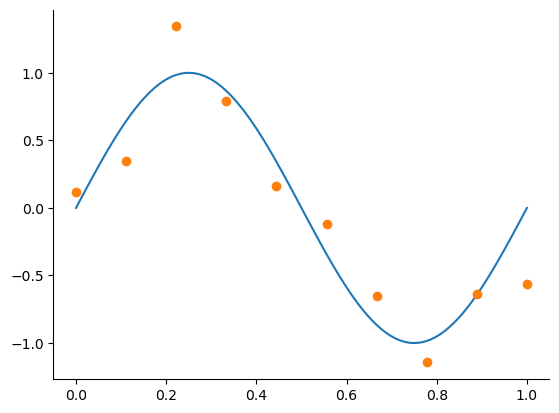

In [2895]:
plt.plot(x_plot, y_plot, '-')
plt.plot(x_train, y_train,'o')

In [2897]:
def transform_features(X,m):
    #create a polynomial of specified degree
    return PolynomialFeatures(degree=m).fit_transform(X.reshape(-1,1))

In [2899]:
x_test = np.arange(0, 1.01, 1.01)
y_test = generate_noisy_data(x_test)


In [2901]:
features_train_m_9 = transform_features(x_train, 9)
features_test_m_9 = transform_features(x_test, 9)

In [2903]:
alpha = 5e-3
beta = 11.1

In [2905]:
#first compute S 
S_inv = alpha*np.eye(
    features_train_m_9.shape[1],
    features_train_m_9.shape[1])+ beta * (features_train_m_9.T @ features_train_m_9)


In [2907]:
#posterior covariance matix
S = np.linalg.inv(S_inv)
#posterior mean 
mean = beta * S @ features_train_m_9.T @ y_train 

In [2909]:
#the prediction on test data 

In [2911]:
# we here compute the mean and variance of each point 

In [2913]:
y_pred_mean = features_test_m_9 @ mean 

In [2915]:
y_pred_var = 1/beta + np.sum(features_test_m_9 @ S * features_test_m_9, axis=1)

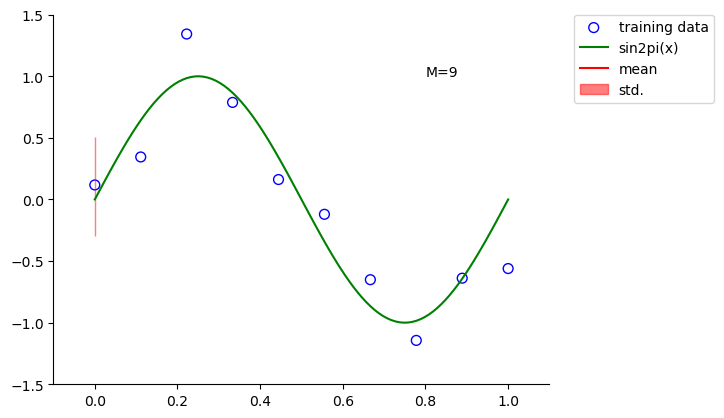

In [2917]:
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_plot, y_plot, c="g", label="sin2pi(x)")
plt.plot(x_test, y_pred_mean, c="r", label="mean")
plt.fill_between(x_test, y_pred_mean - np.sqrt(y_pred_var), y_pred_mean + np.sqrt(y_pred_var), color="red", label="std.", alpha=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(0.8, 1))
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.);